In [17]:
# Import required packages and functions and set the session seed
import numpy as np
np.random.seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout, SpatialDropout2D
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers

In [3]:
# Load the Fashion MNIST data from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Normalize the image data by dividing through the maximum pixel value (=255)
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

In [5]:
# Build a simple three-layer (1 hidden layer) model
# The input size is 28 x 28 pixels and is flattened to a vector of length 784
# The activation function is RELU (rectified linear unit) and performs the 
# multiplication of input and weights (plus bias)
# The output (softmax) layer returns probabilities for all ten classes
three_layer_model = Sequential()
three_layer_model.add(Flatten(input_shape = (28, 28)))
three_layer_model.add(Dense(128, activation = 'relu'))
three_layer_model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Compile the model with accuracy metric and adam optimizer
# Sparse categorical cross-entropy is the loss function for integer labels
# Fit the model using 70 percent of the data and 10 epochs
three_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                          optimizer = 'adam', metrics = ['accuracy'])
three_layer_model.fit(train_images, train_labels, epochs = 10, 
                      validation_split = 0.3, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 2s - loss: 0.5272 - acc: 0.8147 - val_loss: 0.4240 - val_acc: 0.8543
Epoch 2/10
 - 3s - loss: 0.3953 - acc: 0.8574 - val_loss: 0.3958 - val_acc: 0.8587
Epoch 3/10
 - 2s - loss: 0.3549 - acc: 0.8712 - val_loss: 0.3641 - val_acc: 0.8684
Epoch 4/10
 - 2s - loss: 0.3300 - acc: 0.8783 - val_loss: 0.3533 - val_acc: 0.8698
Epoch 5/10
 - 2s - loss: 0.3076 - acc: 0.8864 - val_loss: 0.3546 - val_acc: 0.8732
Epoch 6/10
 - 2s - loss: 0.2942 - acc: 0.8912 - val_loss: 0.3352 - val_acc: 0.8768
Epoch 7/10
 - 2s - loss: 0.2782 - acc: 0.8973 - val_loss: 0.3289 - val_acc: 0.8811
Epoch 8/10
 - 2s - loss: 0.2657 - acc: 0.9015 - val_loss: 0.3672 - val_acc: 0.8673
Epoch 9/10
 - 2s - loss: 0.2579 - acc: 0.9045 - val_loss: 0.3380 - val_acc: 0.8794
Epoch 10/10
 - 2s - loss: 0.2465 - acc: 0.9090 - val_loss: 0.3414 - val_acc: 0.8770


In [31]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with three layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 14us/step
Model with three layers and ten epochs -- Test loss: 36.64220314621925
Model with three layers and ten epochs -- Test accuracy: 87.09


In [32]:
# Similarly as before, build a five-layer (3 hidden layers) model
five_layer_model = Sequential()
five_layer_model.add(Flatten(input_shape = (28, 28)))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(128, activation = 'relu'))
five_layer_model.add(Dense(10, activation = 'softmax'))

In [33]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
five_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                         optimizer = 'adam', metrics = ['accuracy'])
five_layer_model.fit(train_images, train_labels, epochs = 10, 
                     validation_split = 0.3, verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 3s - loss: 0.5278 - acc: 0.8103 - val_loss: 0.4236 - val_acc: 0.8461
Epoch 2/10
 - 4s - loss: 0.3843 - acc: 0.8592 - val_loss: 0.3684 - val_acc: 0.8664
Epoch 3/10
 - 3s - loss: 0.3430 - acc: 0.8735 - val_loss: 0.3724 - val_acc: 0.8654
Epoch 4/10
 - 3s - loss: 0.3200 - acc: 0.8819 - val_loss: 0.3828 - val_acc: 0.8661
Epoch 5/10
 - 3s - loss: 0.3012 - acc: 0.8873 - val_loss: 0.3639 - val_acc: 0.8648
Epoch 6/10
 - 2s - loss: 0.2842 - acc: 0.8940 - val_loss: 0.3294 - val_acc: 0.8802
Epoch 7/10
 - 2s - loss: 0.2747 - acc: 0.8968 - val_loss: 0.3431 - val_acc: 0.8776
Epoch 8/10
 - 3s - loss: 0.2596 - acc: 0.9026 - val_loss: 0.3171 - val_acc: 0.8886
Epoch 9/10
 - 3s - loss: 0.2493 - acc: 0.9052 - val_loss: 0.3398 - val_acc: 0.8817
Epoch 10/10
 - 3s - loss: 0.2434 - acc: 0.9076 - val_loss: 0.3577 - val_acc: 0.8742


In [34]:
# Compute and print the test loss and accuracy
test_loss, test_acc = five_layer_model.evaluate(test_images, test_labels)
print("Model with five layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with five layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 34us/step
Model with five layers and ten epochs -- Test loss: 38.488838860988615
Model with five layers and ten epochs -- Test accuracy: 86.03


In [35]:
# Similarly as before, build a ten-layer (8 hidden layers) model
ten_layer_model = Sequential()
ten_layer_model.add(Flatten(input_shape = (28, 28)))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(128, activation = 'relu'))
ten_layer_model.add(Dense(10, activation = 'softmax'))

In [36]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 10 epochs
ten_layer_model.compile(loss = 'sparse_categorical_crossentropy', 
                        optimizer = 'adam', metrics = ['accuracy'])
ten_layer_model.fit(train_images, train_labels, epochs = 10, 
                    validation_split = 0.3, verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 5s - loss: 0.5818 - acc: 0.7879 - val_loss: 0.5485 - val_acc: 0.8081
Epoch 2/10
 - 5s - loss: 0.4234 - acc: 0.8480 - val_loss: 0.4156 - val_acc: 0.8493
Epoch 3/10
 - 5s - loss: 0.3863 - acc: 0.8603 - val_loss: 0.4471 - val_acc: 0.8338
Epoch 4/10
 - 5s - loss: 0.3597 - acc: 0.8697 - val_loss: 0.3600 - val_acc: 0.8714
Epoch 5/10
 - 5s - loss: 0.3423 - acc: 0.8761 - val_loss: 0.3530 - val_acc: 0.8770
Epoch 6/10
 - 6s - loss: 0.3266 - acc: 0.8809 - val_loss: 0.3722 - val_acc: 0.8708
Epoch 7/10
 - 5s - loss: 0.3139 - acc: 0.8873 - val_loss: 0.3683 - val_acc: 0.8713
Epoch 8/10
 - 6s - loss: 0.3015 - acc: 0.8897 - val_loss: 0.3334 - val_acc: 0.8824
Epoch 9/10
 - 5s - loss: 0.2917 - acc: 0.8921 - val_loss: 0.3505 - val_acc: 0.8762
Epoch 10/10
 - 5s - loss: 0.2829 - acc: 0.8964 - val_loss: 0.3382 - val_acc: 0.8821


In [37]:
# Compute and print the test loss and accuracy
test_loss, test_acc = ten_layer_model.evaluate(test_images, test_labels)
print("Model with ten layers and ten epochs -- Test loss:", test_loss * 100)
print("Model with ten layers and ten epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 38us/step
Model with ten layers and ten epochs -- Test loss: 36.13102122664451
Model with ten layers and ten epochs -- Test accuracy: 87.58


In [7]:
# Compile the model with accuracy metric and adam optimizer
# Fit the model using 70 percent of the data and 50 epochs
three_layer_model_50_epochs = three_layer_model.fit(train_images, train_labels, 
                                                  epochs = 50, validation_split = 0.3,
                                                  verbose = 2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
 - 2s - loss: 0.2380 - acc: 0.9109 - val_loss: 0.3264 - val_acc: 0.8854
Epoch 2/50
 - 2s - loss: 0.2303 - acc: 0.9142 - val_loss: 0.3300 - val_acc: 0.8842
Epoch 3/50
 - 2s - loss: 0.2201 - acc: 0.9187 - val_loss: 0.3325 - val_acc: 0.8842
Epoch 4/50
 - 2s - loss: 0.2149 - acc: 0.9203 - val_loss: 0.3373 - val_acc: 0.8854
Epoch 5/50
 - 2s - loss: 0.2098 - acc: 0.9213 - val_loss: 0.3133 - val_acc: 0.8929
Epoch 6/50
 - 2s - loss: 0.2013 - acc: 0.9237 - val_loss: 0.3382 - val_acc: 0.8887
Epoch 7/50
 - 2s - loss: 0.1959 - acc: 0.9265 - val_loss: 0.3345 - val_acc: 0.8881
Epoch 8/50
 - 2s - loss: 0.1877 - acc: 0.9301 - val_loss: 0.3384 - val_acc: 0.8874
Epoch 9/50
 - 2s - loss: 0.1822 - acc: 0.9316 - val_loss: 0.3352 - val_acc: 0.8887
Epoch 10/50
 - 2s - loss: 0.1785 - acc: 0.9329 - val_loss: 0.3505 - val_acc: 0.8887
Epoch 11/50
 - 2s - loss: 0.1710 - acc: 0.9375 - val_loss: 0.3702 - val_acc: 0.8837
Epoch 12/50
 - 2s - loss: 0.1712 - 

In [9]:
# Compute and print the test loss and accuracy
test_loss, test_acc = three_layer_model.evaluate(test_images, test_labels)
print("Model with three layers and fifty epochs -- Test loss:", test_loss * 100)
print("Model with three layers and fifty epochs -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 19us/step
Model with three layers and fifty epochs -- Test loss: 54.732778462767605
Model with three layers and fifty epochs -- Test accuracy: 88.68


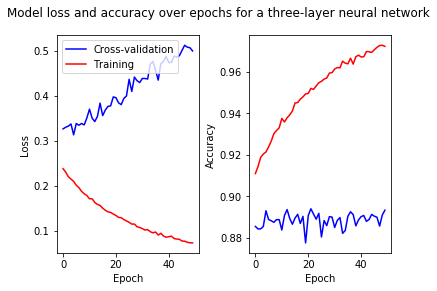

In [12]:
# Plot loss as function of epochs
plt.subplot(1, 2, 1)
plt.plot(three_layer_model_50_epochs.history['val_loss'], 'blue')
plt.plot(three_layer_model_50_epochs.history['loss'], 'red')
plt.legend(['Cross-validation', 'Training'], loc = 'upper left')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot accuracy as function of epochs
plt.subplot(1, 2, 2)
plt.plot(three_layer_model_50_epochs.history['val_acc'], 'blue')
plt.plot(three_layer_model_50_epochs.history['acc'], 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplots_adjust(wspace = .35)

# Include plot title and show the plot
plt.suptitle('Model loss and accuracy over epochs for a three-layer neural network')
plt.show()

In [13]:
# Calculate and print predictions versus actual labels
predictions = three_layer_model.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))

Prediction 0: 9
Actual 0: 9
Prediction 1: 2
Actual 1: 2
Prediction 2: 1
Actual 2: 1
Prediction 3: 1
Actual 3: 1
Prediction 4: 0
Actual 4: 6
Prediction 5: 1
Actual 5: 1
Prediction 6: 4
Actual 6: 4
Prediction 7: 6
Actual 7: 6
Prediction 8: 5
Actual 8: 5
Prediction 9: 7
Actual 9: 7


In [20]:
# Reload the data for a convolutional neural network
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [21]:
# Reshape the data to the correct format (the last 1 stands for greyscale)
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [22]:
# Convert the image data to numeric data and normalize them
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / train_images.max()
test_images = test_images / test_images.max()

In [23]:
# One-hot encode the label data
# Convert every number to a vector of the length of the number of categories
# The vector has zero everywhere except a one on the position of the number it 
# represents. Example: 3 = [0 0 0 1 0 0 0 0 0 0]
train_labels_bin = to_categorical(train_labels)
test_labels_bin = to_categorical(test_labels)

In [24]:
# Build a convolutional neural network with two convolutional layers
conv_model = Sequential()
conv_model.add(Conv2D(128, (3, 3), input_shape = (28, 28, 1)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Conv2D(128, (3, 3)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size = (2, 2)))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

In [25]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
conv_model.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_model.fit(train_images, train_labels_bin, batch_size = 128, 
               epochs = 10, verbose = 2)

Epoch 1/10
 - 127s - loss: 0.4629 - acc: 0.8333
Epoch 2/10
 - 126s - loss: 0.3047 - acc: 0.8893
Epoch 3/10
 - 120s - loss: 0.2619 - acc: 0.9052
Epoch 4/10
 - 121s - loss: 0.2324 - acc: 0.9142
Epoch 5/10


KeyboardInterrupt: 

In [ ]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs -- Test accuracy:", test_acc * 100)

In [28]:
# Build a convolutional neural network with two convolutional layers
# Decrease number of neurons and add dropout to reduce overfitting
conv_model_reduce_overfit = Sequential()
conv_model_reduce_overfit.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1)))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Conv2D(64, (3, 3)))
conv_model_reduce_overfit.add(SpatialDropout2D(0.5))
conv_model_reduce_overfit.add(Activation('relu'))
conv_model_reduce_overfit.add(MaxPooling2D(pool_size = (2, 2)))
conv_model_reduce_overfit.add(Flatten())
conv_model_reduce_overfit.add(Dense(64))
conv_model_reduce_overfit.add(Dropout(0.5))
conv_model_reduce_overfit.add(Dense(10))
conv_model_reduce_overfit.add(Activation('softmax'))

In [29]:
# Compile and fit the model with adam optimizer and accuracy metric
# Categorical cross-entropy is the loss function for one-hot encoded labels and
# batch size equal to the number of neurons in the convolutional layers and 10 epochs
# Add early stopping to avoid overfitting
conv_model_reduce_overfit.compile(loss = "categorical_crossentropy", 
                   optimizer = 'adam', metrics = ['accuracy'])
conv_callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
conv_model_reduce_overfit.fit(train_images, train_labels_bin, validation_split = 0.3,
               epochs = 10, verbose = 2, callbacks = [conv_callback], batch_size = 64)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 31s - loss: 0.7606 - acc: 0.7243 - val_loss: 0.4695 - val_acc: 0.8369
Epoch 2/10
 - 34s - loss: 0.5165 - acc: 0.8166 - val_loss: 0.3896 - val_acc: 0.8603
Epoch 3/10
 - 32s - loss: 0.4597 - acc: 0.8383 - val_loss: 0.3502 - val_acc: 0.8748
Epoch 4/10
 - 33s - loss: 0.4294 - acc: 0.8476 - val_loss: 0.3333 - val_acc: 0.8774
Epoch 5/10
 - 33s - loss: 0.4075 - acc: 0.8543 - val_loss: 0.3229 - val_acc: 0.8831
Epoch 6/10
 - 34s - loss: 0.3951 - acc: 0.8602 - val_loss: 0.3167 - val_acc: 0.8839
Epoch 7/10
 - 33s - loss: 0.3825 - acc: 0.8651 - val_loss: 0.3151 - val_acc: 0.8839
Epoch 8/10
 - 35s - loss: 0.3751 - acc: 0.8678 - val_loss: 0.2962 - val_acc: 0.8916
Epoch 9/10
 - 35s - loss: 0.3686 - acc: 0.8698 - val_loss: 0.3034 - val_acc: 0.8879
Epoch 10/10
 - 33s - loss: 0.3642 - acc: 0.8699 - val_loss: 0.2917 - val_acc: 0.8936


In [30]:
# Compute and print the test loss and accuracy
test_loss, test_acc = conv_model_reduce_overfit.evaluate(test_images, test_labels_bin)
print("Convolutional model ten epochs reduced overfit -- Test loss:", test_loss * 100)
print("Convolutional model ten epochs reduced overfit -- Test accuracy:", test_acc * 100)

10000/10000 [==============================] - 2s 208us/step
Convolutional model ten epochs reduced overfit -- Test loss: 30.780641422271728
Convolutional model ten epochs reduced overfit -- Test accuracy: 88.83


In [32]:
# Calculate and print predictions versus actual labels
predictions = conv_model_reduce_overfit.predict(test_images)
for i in range(10):
  print("Prediction " + str(i) + ": " + str(np.argmax(np.round(predictions[i]))))
  print("Actual " + str(i) + ": " + str(test_labels[i]))

Prediction 0: 9
Actual 0: 9
Prediction 1: 2
Actual 1: 2
Prediction 2: 1
Actual 2: 1
Prediction 3: 1
Actual 3: 1
Prediction 4: 6
Actual 4: 6
Prediction 5: 1
Actual 5: 1
Prediction 6: 4
Actual 6: 4
Prediction 7: 6
Actual 7: 6
Prediction 8: 5
Actual 8: 5
Prediction 9: 7
Actual 9: 7
